In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,f1_score, roc_curve, auc, accuracy_score,precision_score,recall_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

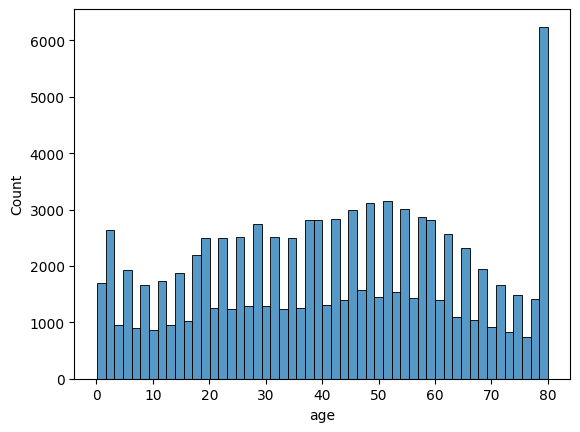

In [6]:
sns.histplot(df['age'])


In [7]:
df['age'] = np.ceil(df['age'])

In [8]:
df['age'].value_counts().to_frame().sort_values(by='age',ascending=True)

,count
age,
1.0,994
2.0,2293
3.0,1038
4.0,953
5.0,993
...,...
76.0,733
77.0,730
78.0,682


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

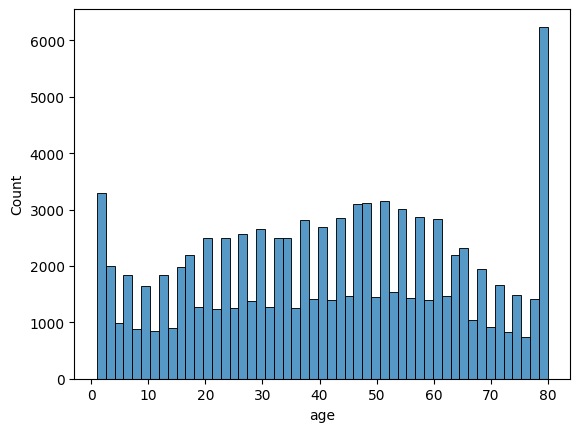

In [9]:
sns.histplot(df['age'])


<Axes: xlabel='diabetes', ylabel='count'>

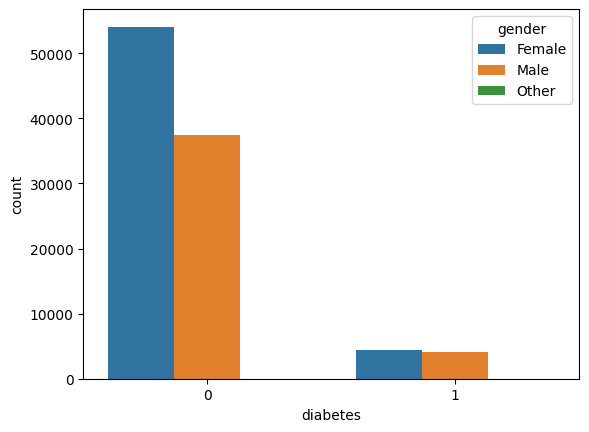

In [10]:
sns.countplot(x = df["diabetes"], hue=df["gender"])

<Axes: xlabel='diabetes', ylabel='count'>

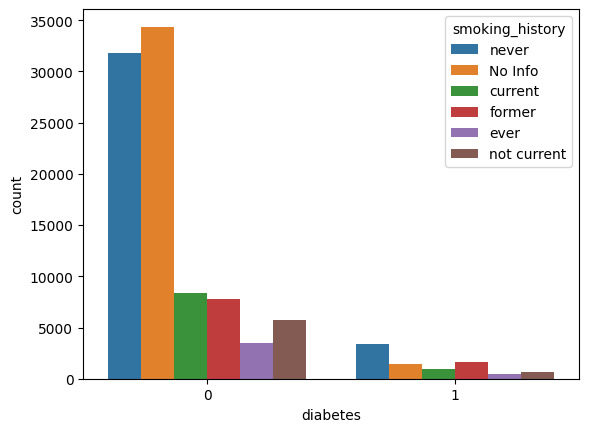

In [11]:
sns.countplot(x=df['diabetes'],hue=df['smoking_history'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='diabetes'>

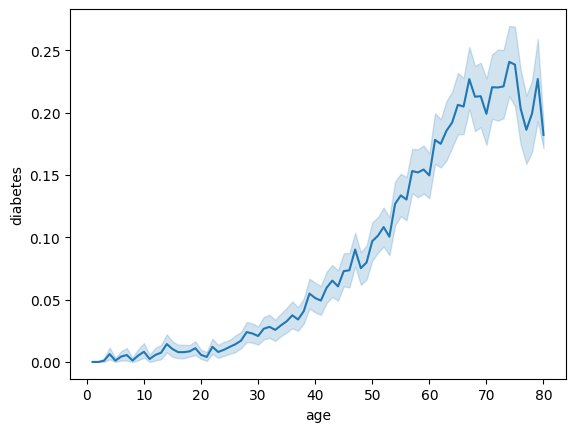

In [12]:
sns.lineplot(df, x= df['age'], y=df['diabetes'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='bmi'>

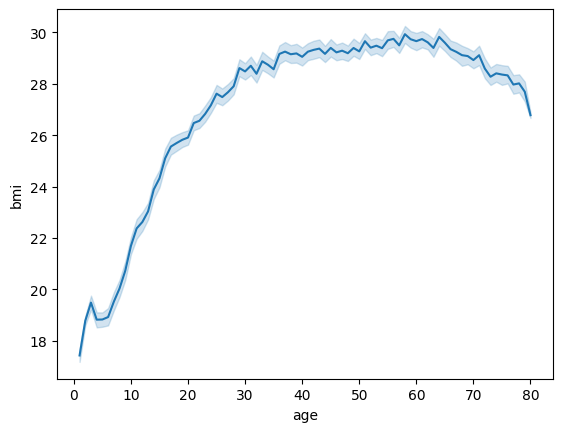

In [13]:
sns.lineplot(df, x= df['age'], y=df['bmi'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

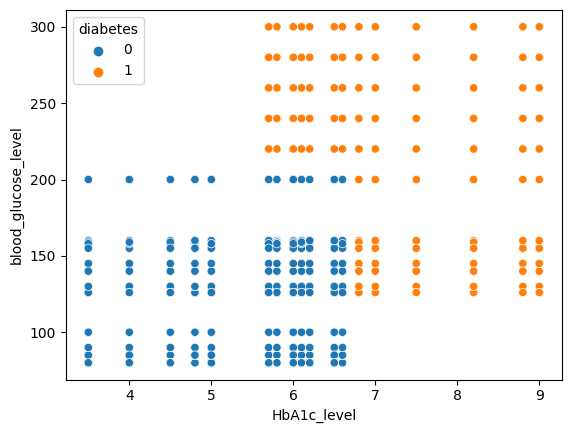

In [15]:
sns.scatterplot(df, x= df['HbA1c_level'], y=df['blood_glucose_level'], hue = df['diabetes'])

In [16]:
# no 1 step is to extract features and target variables seprately 

In [17]:
features  = df.iloc[:,:-1].copy(deep=True)
target = df.iloc[:,-1].copy(deep=True)

In [18]:
features

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [19]:
encoded_data = pd.get_dummies(features[['gender','smoking_history']],dtype=int)
features.drop(['gender','smoking_history'],axis=1,inplace=True)

In [20]:
features = pd.concat([features,encoded_data],axis=1)
features.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0


In [21]:
target.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [22]:
# Combining target and training examples to upscale the minority class
preprocessed_data_set = pd.concat([features,target],axis = 1)

Here we can see that our dataset is imbalanced so we'll upample our minority dataset by randomly selecting minority class with replacement 

In [23]:
majority = preprocessed_data_set[preprocessed_data_set.diabetes==0]
minority = preprocessed_data_set[preprocessed_data_set.diabetes==1]

In [24]:
minority_upsampled = minority.sample(n=len(majority), replace=True, random_state=42)
preprocessed_dataset_upsampled = pd.concat([minority_upsampled,majority])
len(preprocessed_dataset_upsampled)

183000

In [25]:
up_features = preprocessed_dataset_upsampled.iloc[:,:-1].copy(deep=True)
up_target = preprocessed_dataset_upsampled.iloc[:,-1].copy(deep=True)

In [26]:
features_train, features_test, target_train, target_test = train_test_split(
up_features, up_target, test_size=0.2, random_state=1)

In [27]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier()
]

In [28]:
for clf in classifiers:
    clf.fit(features_train,target_train)
    ypred = clf.predict(features_test)
    accuracy = accuracy_score(target_test,ypred)
    print(f'for {type(clf).__name__} accuracy is {accuracy}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for LogisticRegression accuracy is 0.8812568306010929
for DecisionTreeClassifier accuracy is 0.9840710382513661
for RandomForestClassifier accuracy is 0.9913114754098361
for XGBClassifier accuracy is 0.9405737704918032
for KNeighborsClassifier accuracy is 0.9572131147540983


In [29]:
kf = KFold(n_splits=5,shuffle=True,random_state=51)
cv_result = cross_val_score(RandomForestClassifier(),up_features,up_target,scoring='accuracy',cv=kf)

In [30]:
cv_result.mean()

0.991224043715847

In [31]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [32]:
clf.fit(features_train,target_train)

RandomForestClassifier(n_jobs=-1)

In [33]:
prediction = pd.DataFrame(clf.predict(features_test),columns=['prediction'])
features_test.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)
prediction.reset_index(drop=True, inplace=True)
result = pd.concat([features_test,target_test,prediction],axis=1)

In [34]:
matrix = confusion_matrix(target_test,prediction)
class_names = target_test.unique()
df = pd.DataFrame(matrix, index=class_names, columns=class_names)
matrix

array([[17866,   323],
       [    5, 18406]])

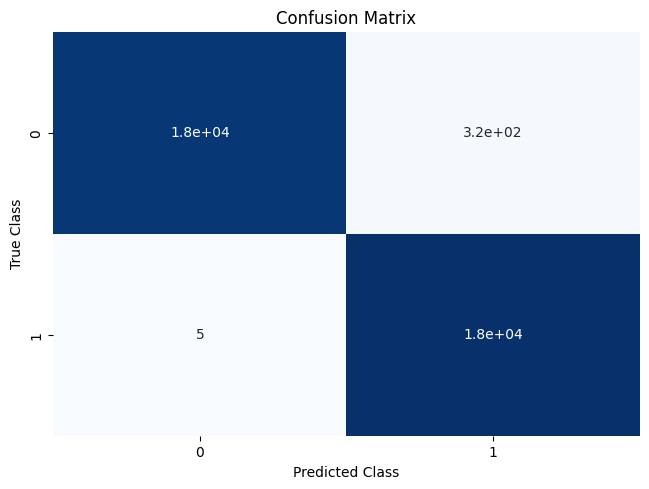

In [35]:
sns.heatmap(matrix, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [36]:
precision = precision_score(target_test,prediction)
precision

0.9827540178333066

In [37]:
recall = recall_score(target_test,prediction)
recall

0.9997284232252458

In [38]:
accuracy = accuracy_score(target_test,prediction)
accuracy

0.9910382513661202

In [39]:
fpr, tpr,_  = roc_curve(target_test,prediction)
roc_auc = auc(fpr, tpr)

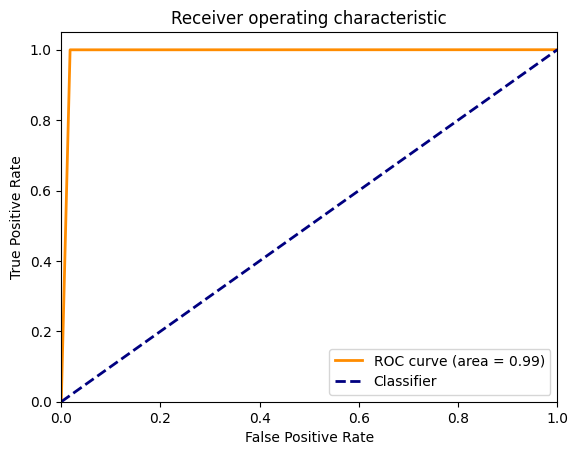

In [40]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **remove redundant features from the model using rfecv and then train the model again and then see how much better it performs**

In [41]:
rfecv = RFECV(RandomForestClassifier(),step=1,scoring='accuracy',n_jobs=-1)

In [42]:
rfecv.fit(up_features,up_target)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RFECV(estimator=RandomForestClassifier(), n_jobs=-1, scoring='accuracy')

In [43]:
rfecv.transform(up_features)

array([[54.,  0.,  0., ...,  0.,  0.,  0.],
       [60.,  0.,  0., ...,  0.,  0.,  0.],
       [60.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [66.,  0.,  0., ...,  0.,  1.,  0.],
       [24.,  0.,  0., ...,  0.,  0.,  1.],
       [57.,  0.,  0., ...,  1.,  0.,  0.]])

In [44]:
rfecv.n_features_

11

In [45]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False])

In [46]:
new_features = up_features.drop(['gender_Female','gender_Other','smoking_history_not current','smoking_history_ever'],axis=1).copy(deep=True)

In [47]:
new_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183000 entries, 85651 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      183000 non-null  float64
 1   hypertension             183000 non-null  int64  
 2   heart_disease            183000 non-null  int64  
 3   bmi                      183000 non-null  float64
 4   HbA1c_level              183000 non-null  float64
 5   blood_glucose_level      183000 non-null  int64  
 6   gender_Male              183000 non-null  int64  
 7   smoking_history_No Info  183000 non-null  int64  
 8   smoking_history_current  183000 non-null  int64  
 9   smoking_history_former   183000 non-null  int64  
 10  smoking_history_never    183000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 16.8 MB


In [48]:
new_features_train, new_features_test, new_target_train, new_target_test = train_test_split(
new_features, up_target, test_size=0.2, random_state=1)

In [49]:
for clf in classifiers:
    clf.fit(new_features_train,new_target_train)
    ypred = clf.predict(new_features_test)
    accuracy = accuracy_score(new_target_test,ypred)
    print(f'for {type(clf).__name__} accuracy is {accuracy}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for LogisticRegression accuracy is 0.8733060109289618
for DecisionTreeClassifier accuracy is 0.984535519125683
for RandomForestClassifier accuracy is 0.9915027322404372
for XGBClassifier accuracy is 0.9383606557377049
for KNeighborsClassifier accuracy is 0.9566939890710382


In [50]:
kf = KFold(n_splits=5,shuffle=True,random_state=51)
cv_result = cross_val_score(RandomForestClassifier(),new_features,up_target,scoring='accuracy',cv=kf)

In [51]:
cv_result.mean()

0.9915081967213115

In [52]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [53]:
clf.fit(new_features_train,new_target_train)

RandomForestClassifier(n_jobs=-1)

In [54]:
clf.predict(new_features_test)

array([0, 1, 1, ..., 1, 0, 1])

In [55]:
precision = precision_score(new_target_test,prediction)
precision

0.9827540178333066

In [56]:
accuracy = accuracy_score(new_target_test,prediction)
accuracy

0.9910382513661202

In [57]:
recall = recall_score(new_target_test,prediction)
recall

0.9997284232252458

**Here we can see that the evaluation metrics are still the same after removing some of the redundant features so it helped us to save our resources and one of the shocking discovery is that our algo told us that gender_female is not really relevant for the model and somehow model did a little better after removing all those features. It may seem a little in this case but what if we had millions of rows with same number of columns then it would have been a significant difference.**